<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

<img src = "https://github.com/Jangrae/img/blob/master/carseats.png?raw=true" width=800 align="left"/>

# 실습 내용

- Carseats 데이터에 대해 모델링합니다.
- 다중 선형회귀 모델을 만들고 평가합니다.
- 특히 회귀 계수를 명확히 이해합니다.
- 예측 결과를 시각화합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

In [100]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/Carseats.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [35]:
# 상위 몇 개 행 확인
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


**데이터 설명**

- Sales: 각 지역 판매량(단위: 1,000개)
- CompPrice: 경쟁사 가격 (단위: 달러)
- Income: 지역 평균 소득 (단위: 1,000달러)
- Advertising: 각 지역, 회사의 광고 예산 (단위: 1,000달러)
- Population: 지역 인구 수 (단위: 1,000명)
- Price: 자사 지역별 판매 가격 (단위: 달러)
- ShelveLoc: 진열 상태
- Age: 지역 인구의 평균 연령
- Education: 각 지역 교육 수준
- Urban: 도심 지역 여부 (Yes,No)
- US: 매장이 미국에 있는지 여부 (Yes, No)

In [36]:
# 기초통계량 확인
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [37]:
# NaN 값 확인
data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

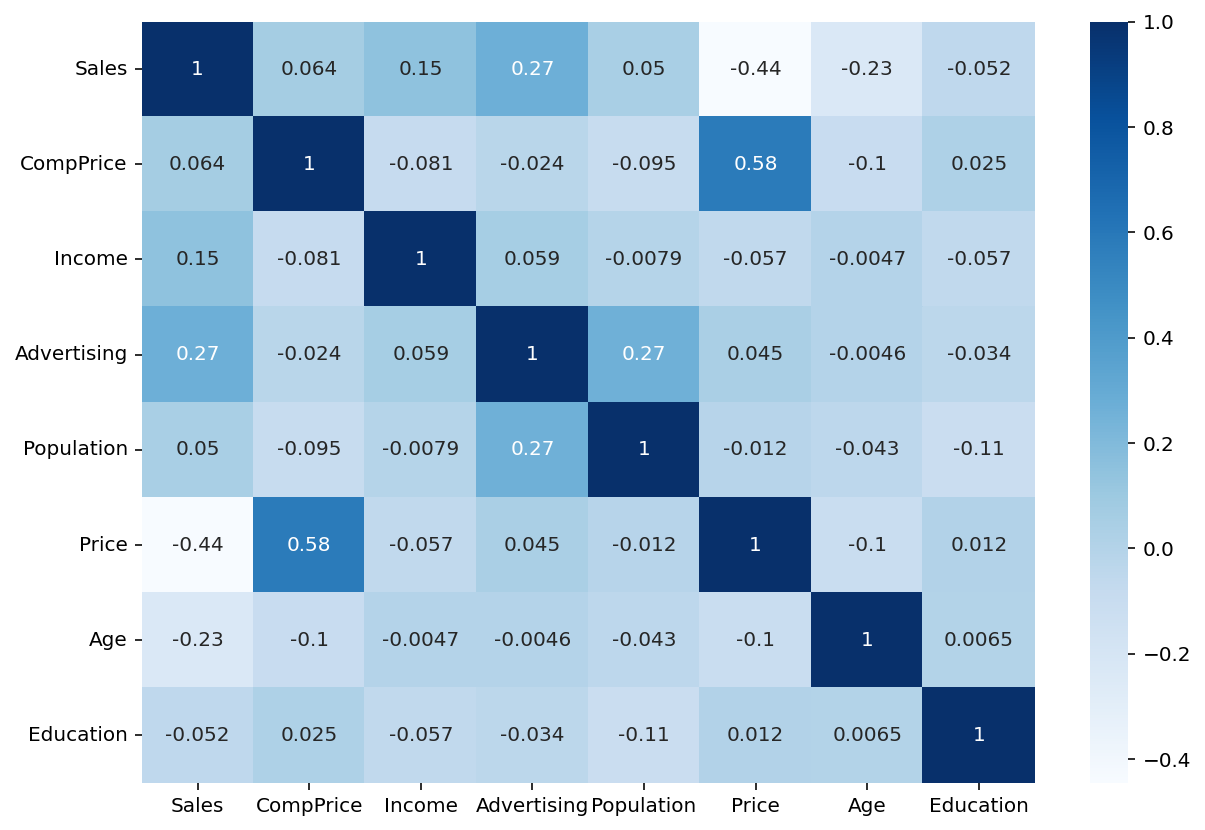

In [104]:
# 상관관계 확인
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True, cmap='Blues')
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [50]:
# target 확인
target = 'Sales'

# 데이터 분리
X = data.drop(target,axis=1)
y = data[target]

In [51]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,111,48,16,260,83,Good,65,10,Yes,Yes
2,113,35,10,269,80,Medium,59,12,Yes,Yes
3,117,100,4,466,97,Medium,55,14,Yes,Yes
4,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes
396,139,23,3,37,120,Medium,55,11,No,Yes
397,162,26,12,368,159,Medium,40,18,Yes,Yes
398,100,79,7,284,95,Bad,50,12,Yes,Yes


**2) 가변수화**

In [52]:
# 가변수화 대상: ShelveLoc, Education, Urban, US
dumm_cols = ['ShelveLoc', 'Education', 'Urban', 'US']

# 가변수화
X = pd.get_dummies(X,columns=dumm_cols,drop_first=True)

# 확인
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Good,ShelveLoc_Medium,Education_11,Education_12,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_Yes,US_Yes
0,138,73,11,276,120,42,0,0,0,0,0,0,0,0,1,0,1,1
1,111,48,16,260,83,65,1,0,0,0,0,0,0,0,0,0,1,1
2,113,35,10,269,80,59,0,1,0,1,0,0,0,0,0,0,1,1
3,117,100,4,466,97,55,0,1,0,0,0,1,0,0,0,0,1,1
4,141,64,3,340,128,38,0,0,0,0,1,0,0,0,0,0,1,0


**3) 학습용, 평가용 데이터 분리**

In [53]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.

In [54]:
# 1단계: 불러오기
from sklearn.linear_model import LinearRegression


In [55]:
# 2단계: 선언하기
model = LinearRegression()

In [56]:
# 3단계: 학습하기
model.fit(X_train,y_train)

LinearRegression()

In [78]:
# 회귀계수 확인
for i in range(len(model.coef_)):
    print(X.columns[i],':',model.coef_[i])
print('편향:',model.intercept_)

CompPrice : 0.09094067642201917
Income : 0.014909953141344148
Advertising : 0.13101633987101002
Population : -0.00024255796858483502
Price : -0.09174325124762256
Age : -0.04494259648955534
ShelveLoc_Good : 4.772515116573624
ShelveLoc_Medium : 1.8822523591180853
Education_11 : -0.34212503552045376
Education_12 : -0.12391334731064302
Education_13 : -0.055725084238830234
Education_14 : -0.4258884590767866
Education_15 : 0.13306790571413907
Education_16 : -0.4262070855224719
Education_17 : -0.09313461304442738
Education_18 : -0.24924030280845821
Urban_Yes : 0.058481584529345834
US_Yes : -0.28299916051905394
편향: 5.663851202199177


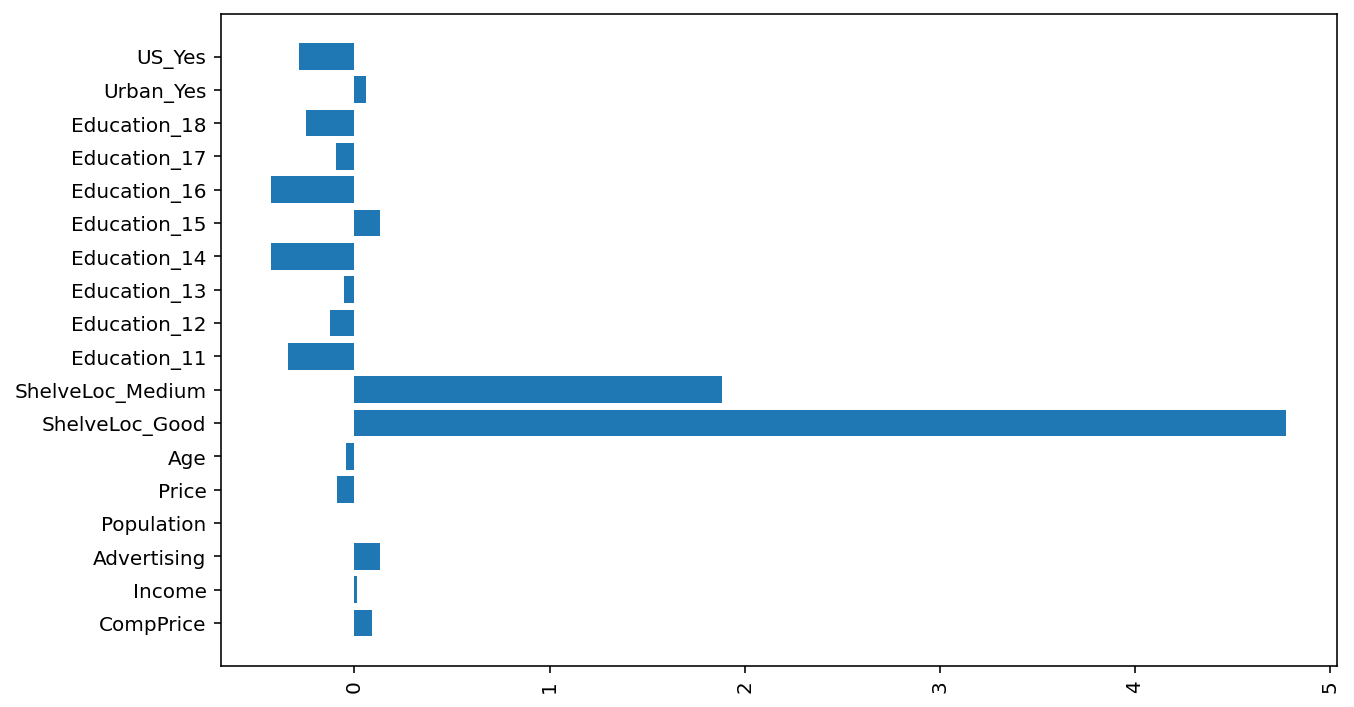

In [91]:
# 가중치 시각화 
tmp = pd.DataFrame()
tmp['feature'] = X.columns
tmp['weight'] = model.coef_
plt.figure(figsize=(10,6))
plt.barh(tmp['feature'],tmp['weight'])
plt.xticks(rotation = 90)
plt.show()

# 그러나 드롭 퍼스트로 인해서 표현되지 않는 변수에 대한 가중치 확인이 불가하므로, 설명을 위한 시각화로는 적절치 않음. 
# 가변수화가 된 이상, 기계의 성능을 위한 행위이지 인간의 데이터 해석을 위한 행위는 아님. 

In [102]:
# 가변수화 대상: ShelveLoc, Education, Urban, US
dumm_cols = ['ShelveLoc', 'Education', 'Urban', 'US']

# 가변수화
dumm_data = pd.get_dummies(data,columns=dumm_cols,drop_first=False)

# 확인
dumm_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,...,Education_13,Education_14,Education_15,Education_16,Education_17,Education_18,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,1,0,0,...,0,0,0,0,1,0,0,1,0,1
1,11.22,111,48,16,260,83,65,0,1,0,...,0,0,0,0,0,0,0,1,0,1
2,10.06,113,35,10,269,80,59,0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,7.40,117,100,4,466,97,55,0,0,1,...,0,1,0,0,0,0,0,1,0,1
4,4.15,141,64,3,340,128,38,1,0,0,...,1,0,0,0,0,0,0,1,1,0


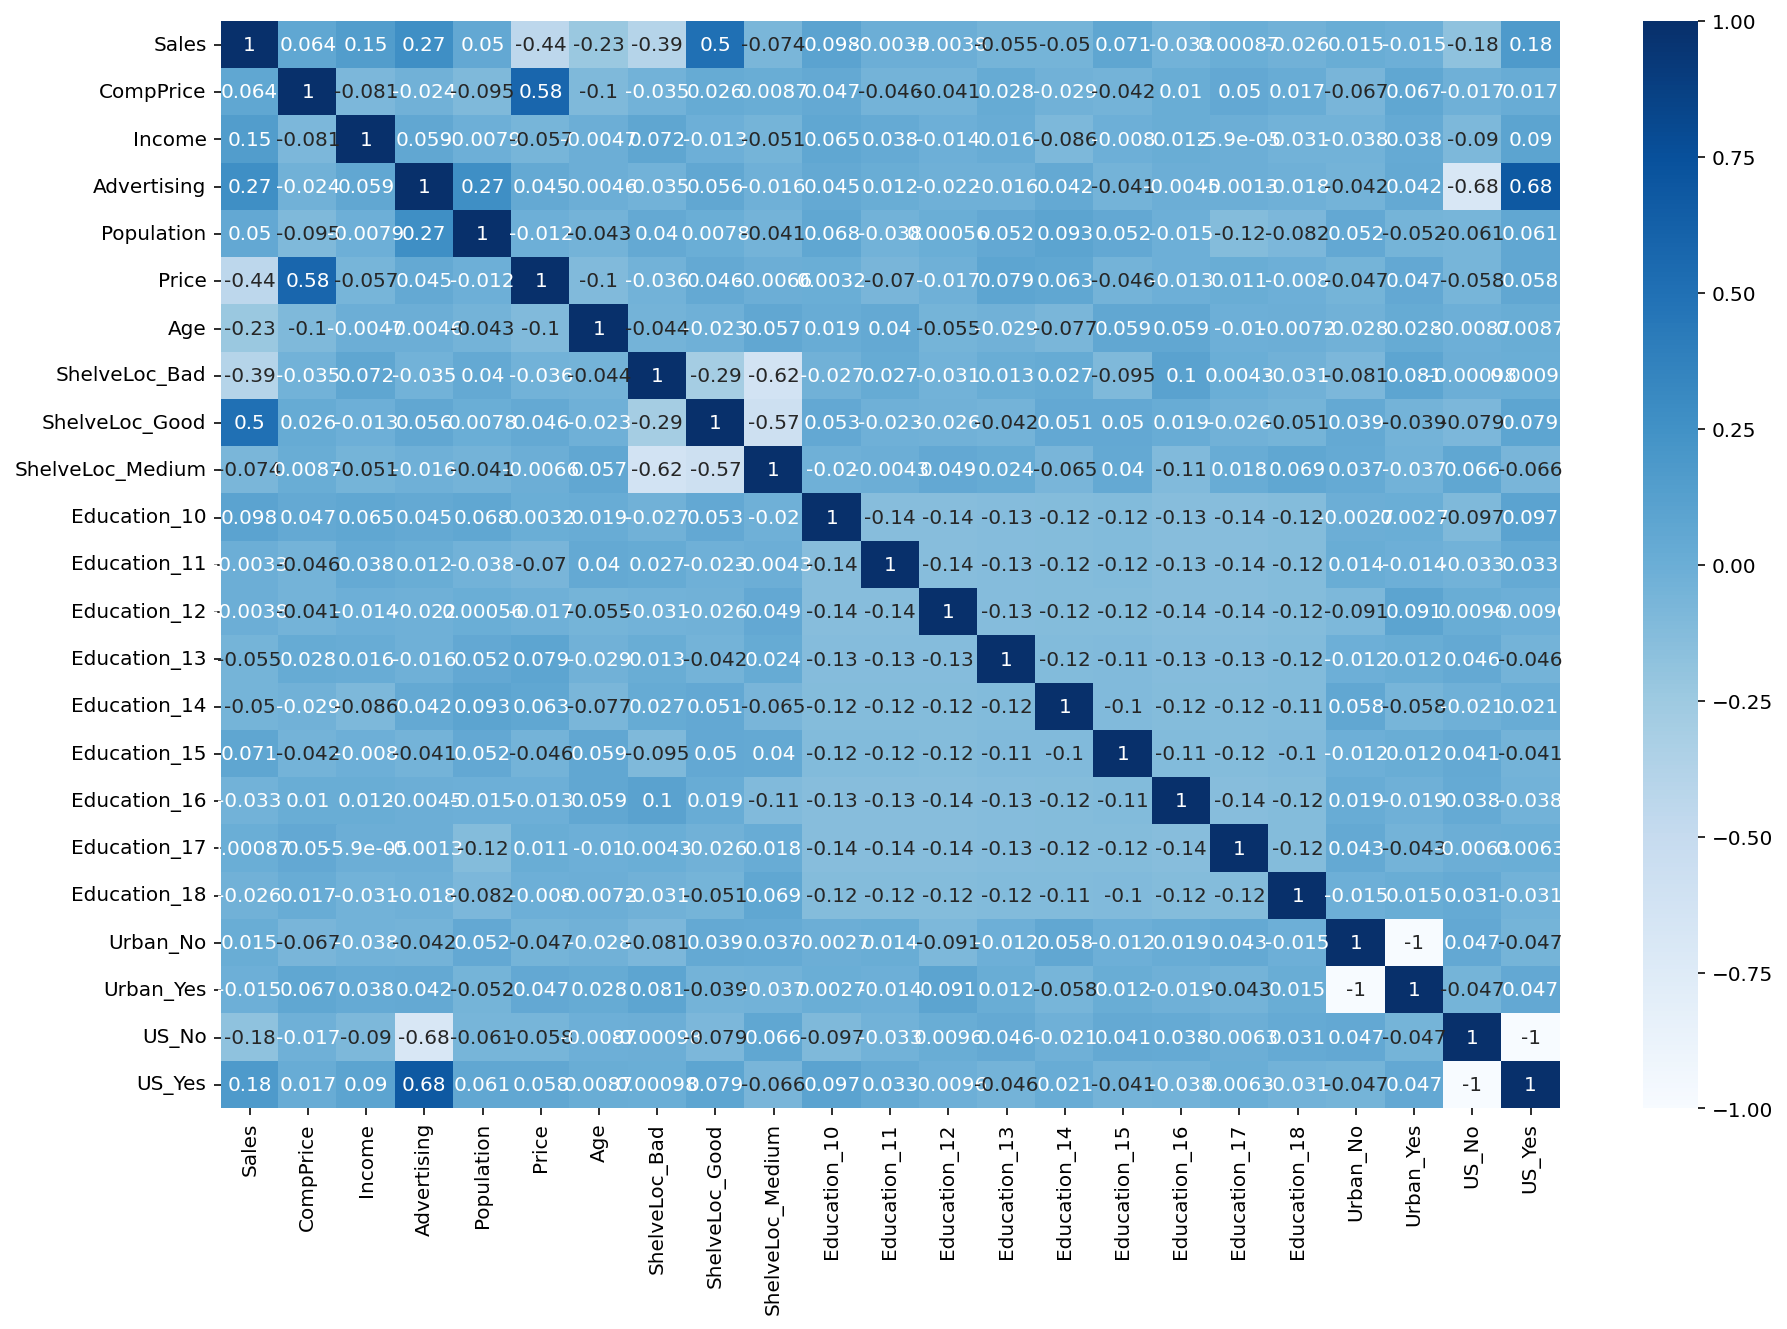

In [103]:
# 더미화된 데이터의 상관관계 확인
plt.figure(figsize=(15,10))
sns.heatmap(dumm_data.corr(),annot=True, cmap='Blues')
plt.show()

In [58]:
# 4단계: 예측하기
y_pred = model.predict(X_test)

In [59]:
# 5단계: 평가하기
from sklearn.metrics import mean_absolute_error, r2_score
print(mean_absolute_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.8291702856537112
0.8752579913475848


In [60]:
result = pd.DataFrame(y_test)
result.rename(columns={'Sales':'Actual'})
result['Predicted'] = y_pred
result

,Sales,Predicted
127,6.52,6.391148
75,8.55,7.451065
150,10.49,10.485548
101,6.20,8.007037
271,4.55,5.107303
...,...,...
200,5.56,5.623755
30,13.55,13.518204
209,3.02,3.953598
261,5.71,6.310554


# 5.기타

- 기타 필요한 내용이 있으면 진행합니다.

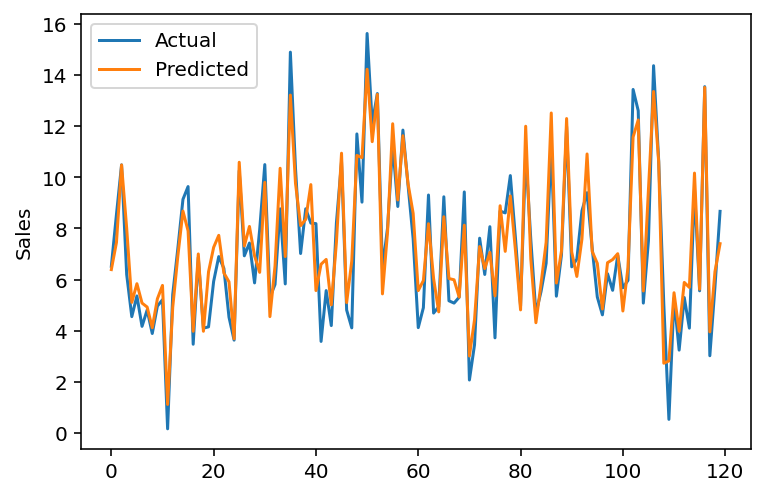

In [61]:
# 예측값, 실제값 시각화

plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.ylabel('Sales')
plt.show()


In [ ]:
# 임의로 가중치를 수정하는것은 가능한가? 
# price가 상관관계 분석을 통해 sales에 영향을 많이 미치는것으로 나왔는데 왜 가중치는 작은가? 